# Parameters selection

In [1]:
import pandas as pd
import numpy as np
import os
import random
import pickle
import matplotlib.pyplot as plt

from libs.big_images import *

## Working with raw data

In [8]:
raw_path="results/raw"

#to_select=random.sample(list(np.arange(300)),100)
#with open('results/distrib.pkl', 'wb') as f:
#    pickle.dump(to_select, f)
with open('results/distrib.pkl', 'rb') as f:
    to_select = pickle.load(f)

paths=[]
predictions=[]

for model in os.listdir(raw_path):
    paths.append(model)
    l=list(pd.read_pickle(os.path.join(raw_path,model))["mask"])
    
    predictions.append([l[i] for i in to_select])
    
model_df=pd.DataFrame({"name":paths,"predictions":predictions})
    

In [9]:
vals_quant=[0.6,0.7,0.8,0.9]
for v in vals_quant:
    model_df["quant"+str(v)]=model_df["predictions"].apply(lambda x :[def_image_quant(y[0],v) for y in x])
    print("ok")

ok
ok
ok
ok


In [11]:
with open('results/distrib.pkl', 'wb') as f:
    pickle.dump(to_select, f)

In [12]:
#model_df.to_pickle("results/quant100.pkl")

In [11]:
vals_val=[0.3,0.4,0.5,0.6]
for v in vals_val:
    model_df["val"+str(v)]=model_df["predictions"].apply(lambda x : [def_image_value(y[0],v) for y in x ])
    print("ok")

ok
ok
ok
ok


In [14]:
#model_df.to_pickle("results/val100.pkl")

## Working with processed data

In [2]:
with open('results/distrib.pkl', 'rb') as f:
    to_select = pickle.load(f)

true=list(pd.read_pickle("results/true.pkl")["mask"])
true_select=[true[i] for i in to_select]

In [3]:
#quants=pd.read_pickle("results/quant100.pkl")
vals=pd.read_pickle("results/val100.pkl")

In [4]:
def compare(true,pred):
    score=0.
    false_positive=0.
    false_negative=0.
    for i in range(len(true)):
        mult=true[i]*pred[i]
        score+=np.sum(mult)/max(0.00001,np.sum(true[i]))
        false_positive+=(np.sum(pred[i]-mult))/(len(true[i])*(len(true[i][0]))-np.sum(mult))
        false_negative+=(np.sum(true[i]-mult))/(len(true[i])*(len(true[i][0]))-np.sum(mult))
    

    return score/len(true),false_positive/len(true),false_negative/len(true)
        
    

In [6]:
cols=list(vals.columns)[2:]
cols

['val0.3', 'val0.4', 'val0.5', 'val0.6']

In [7]:
#res_df=pd.DataFrame(columns=["type","w_size","step","parameter","score","false_positive","false_negative"])
res_df=pd.read_pickle("results/score_comp.pkl")
for i in range(len(vals)):
    for c in cols:
        name=vals["name"].iloc[i]
        res_df.loc[name+"/"+c]=["val",int(name.split("_")[1]),int(name.split("_")[2]),float(c[3:])]+list(compare(true_select,vals[c].iloc[i]))

In [9]:
#res_df.to_pickle("results/score_comp.pkl")

In [19]:
res_df.sort_values("score",ascending=False).head(20)

,type,w_size,step,parameter,score,false_positive,false_negative
pred_64_8_raw.pkl/quant0.6,quant,64,8,0.6,0.639458,0.280752,0.111237
pred_128_32_raw.pkl/quant0.6,quant,128,32,0.6,0.585376,0.263764,0.118915
pred_64_8_raw.pkl/quant0.7,quant,64,8,0.7,0.539845,0.207262,0.132288
pred_128_32_raw.pkl/val0.3,val,128,32,0.3,0.502595,0.220123,0.125205
pred_64_32_raw.pkl/quant0.6,quant,64,32,0.6,0.475559,0.188714,0.137261
pred_128_32_raw.pkl/quant0.7,quant,128,32,0.7,0.473977,0.180848,0.139732
pred_128_64_raw.pkl/quant0.6,quant,128,64,0.6,0.431864,0.205449,0.141754
pred_64_8_raw.pkl/val0.3,val,64,8,0.3,0.422677,0.146041,0.142849
pred_128_64_raw.pkl/val0.3,val,128,64,0.3,0.414333,0.194913,0.141228
pred_64_8_raw.pkl/quant0.8,quant,64,8,0.8,0.411628,0.131322,0.155278


### Loading and analysing the data

In [2]:
res=pd.read_pickle("results/score_comp.pkl")

In [3]:
res

,type,w_size,step,parameter,score,false_positive,false_negative
pred_64_32_raw.pkl/quant0.6,quant,64,32,0.6,0.475559,0.188714,0.137261
pred_64_32_raw.pkl/quant0.7,quant,64,32,0.7,0.410514,0.150933,0.150937
pred_64_32_raw.pkl/quant0.8,quant,64,32,0.8,0.286304,0.093456,0.173294
pred_64_32_raw.pkl/quant0.9,quant,64,32,0.9,0.147547,0.037197,0.192446
pred_128_32_raw.pkl/quant0.6,quant,128,32,0.6,0.585376,0.263764,0.118915
...,...,...,...,...,...,...,...
pred_256_128_raw.pkl/val0.6,val,256,128,0.6,0.004489,0.034945,0.208021
pred_256_64_raw.pkl/val0.3,val,256,64,0.3,0.409515,0.305477,0.137578
pred_256_64_raw.pkl/val0.4,val,256,64,0.4,0.291982,0.206290,0.162137
pred_256_64_raw.pkl/val0.5,val,256,64,0.5,0.243883,0.158416,0.170282


In [8]:
x=list(res.index)

Text(0.5, 1.0, 'score of our models')

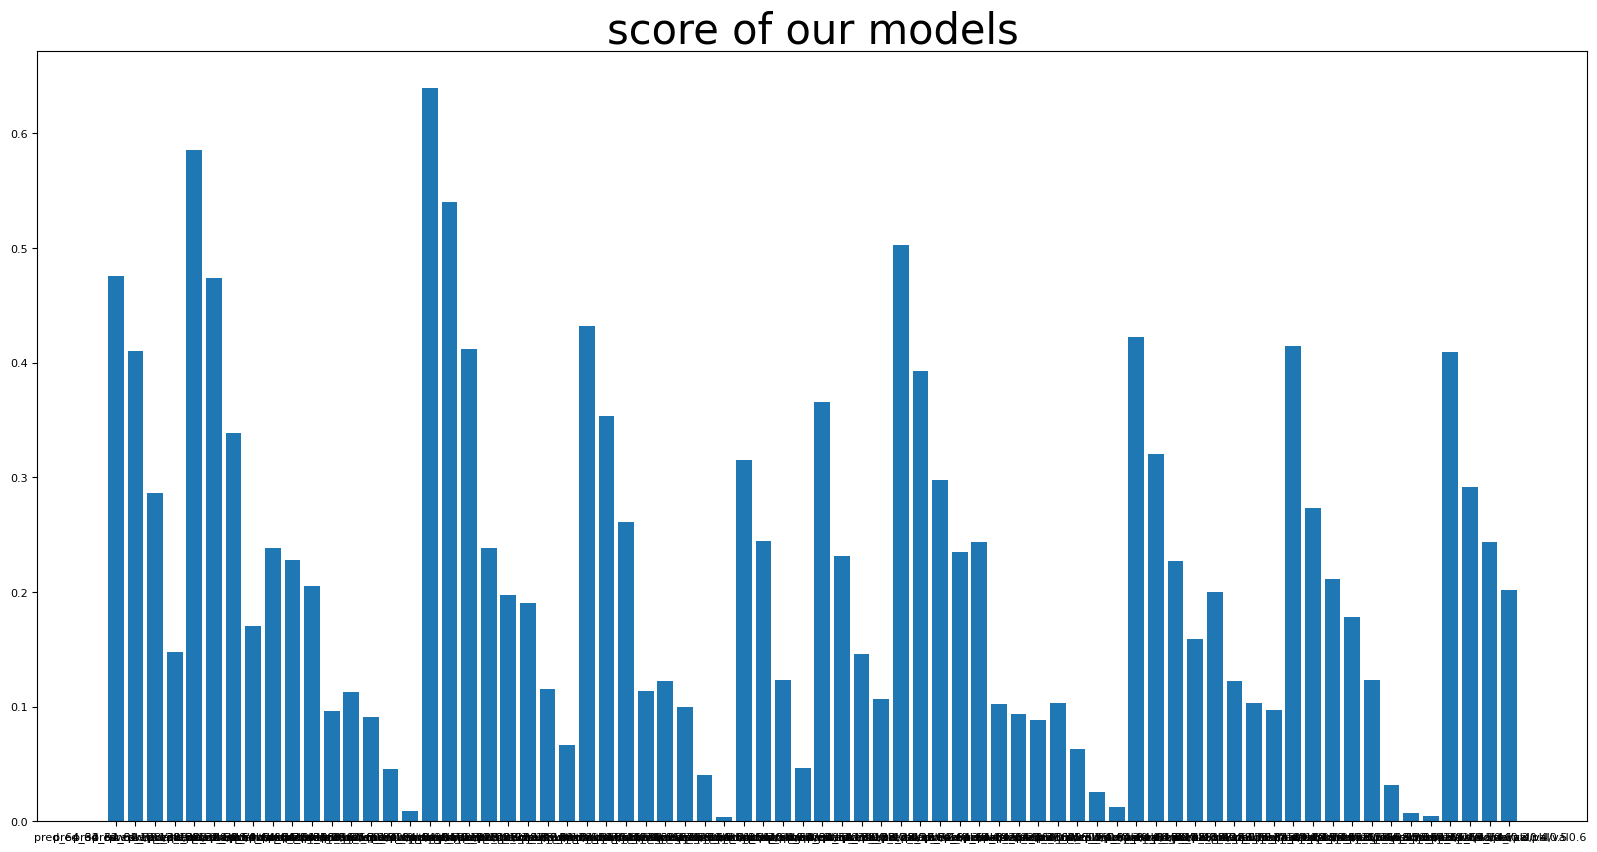

In [26]:
plt.figure(figsize=(20,10))
plt.bar(x,res["score"])
plt.title("score of our models",fontsize="30")

Text(0.5, 1.0, 'score in function of the window size')

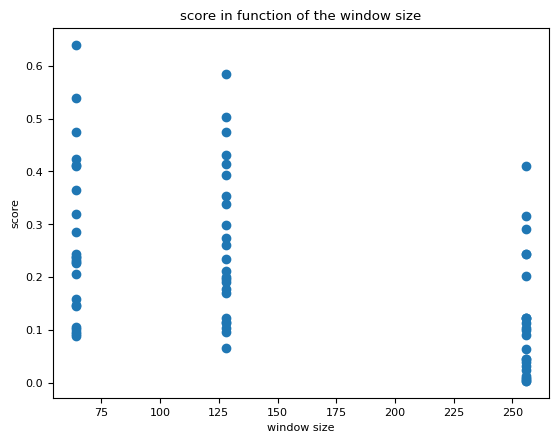

In [31]:
w_size=res["w_size"]
score=res["score"]
plt.scatter(w_size,score)
plt.ylabel("score")
plt.xlabel("window size")
plt.title("score in function of the window size")

Text(0.5, 1.0, 'score in function of the step')

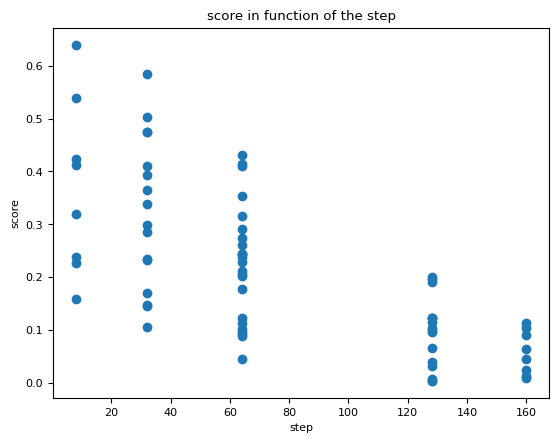

In [32]:
step=res["step"]
score=res["score"]
plt.scatter(step,score)
plt.ylabel("score")
plt.xlabel("step")
plt.title("score in function of the step")

Text(0.5, 1.0, 'mean score for quantile versus value selection')

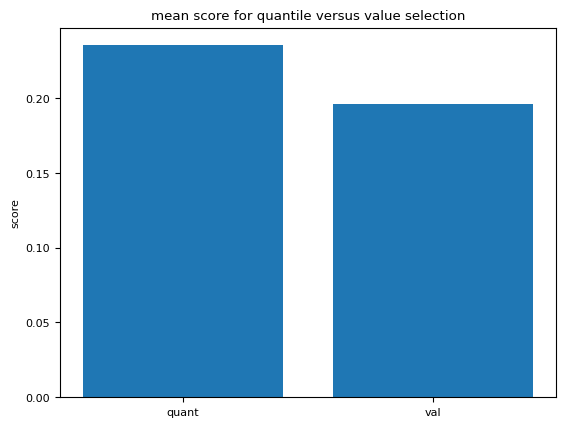

In [37]:
score_quant=sum(res["score"].loc[res["type"]=="quant"])/len(res.loc[res["type"]=="quant"])
score_val=sum(res["score"].loc[res["type"]=="val"])/len(res.loc[res["type"]=="val"])

plt.bar(["quant","val"],[score_quant,score_val])

plt.ylabel("score")
plt.title("mean score for quantile versus value selection")


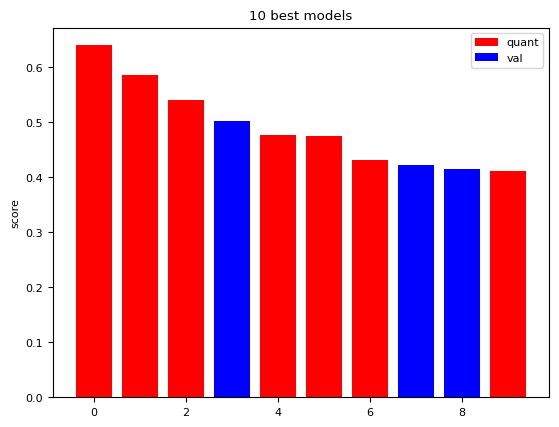

In [53]:
sorted_df=res.sort_values("score",ascending=False)[:10]
score=sorted_df["score"]
labels=sorted_df["type"]
colors={"red":0,"blue":0}
for i in range(len(score)):
    color="red" if labels[i]=="quant" else "blue"
    
    if(colors[color]==0):
        plt.bar([i],[score[i]],color=color,label=labels[i])
        colors[color]=1
    else :
        plt.bar([i],[score[i]],color=color)
plt.ylabel("score")
plt.title("10 best models")
plt.legend()


In [39]:
sorted_df

,type,w_size,step,parameter,score,false_positive,false_negative
pred_64_8_raw.pkl/quant0.6,quant,64,8,0.6,0.639458,0.280752,0.111237
pred_128_32_raw.pkl/quant0.6,quant,128,32,0.6,0.585376,0.263764,0.118915
pred_64_8_raw.pkl/quant0.7,quant,64,8,0.7,0.539845,0.207262,0.132288
pred_128_32_raw.pkl/val0.3,val,128,32,0.3,0.502595,0.220123,0.125205
pred_64_32_raw.pkl/quant0.6,quant,64,32,0.6,0.475559,0.188714,0.137261
pred_128_32_raw.pkl/quant0.7,quant,128,32,0.7,0.473977,0.180848,0.139732
pred_128_64_raw.pkl/quant0.6,quant,128,64,0.6,0.431864,0.205449,0.141754
pred_64_8_raw.pkl/val0.3,val,64,8,0.3,0.422677,0.146041,0.142849
pred_128_64_raw.pkl/val0.3,val,128,64,0.3,0.414333,0.194913,0.141228
pred_64_8_raw.pkl/quant0.8,quant,64,8,0.8,0.411628,0.131322,0.155278
